# Goodness of Fit

In [3]:
#Load your packages
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pa


%matplotlib inline

In [3]:
#https://docs.scipy.org/doc/scipy/reference/stats.html

# All time Greats!

In [6]:
data = pa.read_csv('blues.csv')

I am going to look at Benford's Law here!  It says that the leading digit of any number in the data set has a proportion of $\log_{10}\left(1+\frac1d\right)$

In [10]:
def f(x):
    return(np.log10(1+1/x))

In [12]:
#Let's try it! The most probable digit is 1.

f(1)

0.3010299956639812

In [14]:
#so 
x = np.arange(1,10,1)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
#These are the supposed proportions of the first digits.
f(x)

array([ 0.30103   ,  0.17609126,  0.12493874,  0.09691001,  0.07918125,
        0.06694679,  0.05799195,  0.05115252,  0.04575749])

In [33]:
#Now lets try and get the first digits from my data I will use GP or games played
gp = np.array(data.iloc[1:,6])

In [37]:
gp[0][0]

'2'

In [49]:
firstdig = []
for i in range (0,len(gp)):
    firstdig.append(gp[i][0])

In [50]:


firstdig


['2',
 '7',
 '5',
 '1',
 '5',
 '5',
 '2',
 '7',
 '6',
 '7',
 '7',
 '1',
 '2',
 '9',
 '8',
 '3',
 '7',
 '2',
 '7',
 '3',
 '1',
 '4',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '6',
 '1',
 '5',
 '2',
 '2',
 '5',
 '3',
 '6',
 '3',
 '1',
 '1',
 '1',
 '2',
 '3',
 '5',
 '1',
 '7',
 '1',
 '4',
 '3',
 '3',
 '5',
 '7',
 '1',
 '6',
 '6',
 '3',
 '1',
 '1',
 '2',
 '3',
 '1',
 '8',
 '3',
 '4',
 '1',
 '2',
 '2',
 '5',
 '2',
 '5',
 '1',
 '4',
 '2',
 '1',
 '2',
 '3',
 '4',
 '1',
 '1',
 '2',
 '4',
 '1',
 '4',
 '3',
 '1',
 '3',
 '9',
 '2',
 '2',
 '6',
 '7',
 '3',
 '2',
 '1',
 '8',
 '1',
 '4',
 '3',
 '7',
 '8',
 '3',
 '5',
 '4',
 '6',
 '3',
 '1',
 '2',
 '2',
 '3',
 '6',
 '2',
 '2',
 '4',
 '1',
 '3',
 '4',
 '6',
 '4',
 '7',
 '1',
 '3',
 '4',
 '1',
 '9',
 '5',
 '2',
 '9',
 '1',
 '4',
 '3',
 '2',
 '1',
 '2',
 '2',
 '3',
 '1',
 '2',
 '8',
 '2',
 '9',
 '8',
 '1',
 '3',
 '2',
 '1',
 '2',
 '1',
 '1',
 '7',
 '5',
 '1',
 '1',
 '1',
 '1',
 '7',
 '1',
 '1',
 '6',
 '5',
 '1',
 '9',
 '1',
 '1',
 '3',
 '3'

In [51]:
gp

#Just the first digits of this column!

array(['274', '7', '51', '144', '59', '51', '231', '70', '6', '72', '73',
       '18', '2', '95', '8', '396', '727', '228', '71', '35', '143', '409',
       '23', '150', '149', '284', '16', '13', '24', '1', '120', '6', '159',
       '52', '232', '2', '519', '328', '694', '37', '125', '119', '1',
       '203', '373', '50', '12', '71', '127', '414', '34', '327', '53',
       '7', '144', '6', '61', '332', '13', '157', '226', '32', '17', '82',
       '329', '455', '12', '2', '20', '5', '208', '58', '155', '4', '269',
       '182', '201', '3', '42', '1', '112', '26', '4', '14', '454', '337',
       '175', '345', '92', '22', '2', '64', '78', '3', '284', '167', '82',
       '10', '43', '359', '70', '88', '326', '5', '41', '65', '38', '109',
       '285', '265', '325', '69', '207', '29', '40', '160', '37', '46',
       '68', '43', '7', '118', '37', '494', '12', '94', '5', '2', '93',
       '17', '443', '3', '28', '163', '23', '25', '324', '133', '22', '85',
       '2', '98', '82', '16', '336',

In [53]:
fd = np.array(firstdig)#make it an array

In [54]:
fd = fd.astype(int)#so that you can make it an int in one swoop

In [59]:
count = np.histogram(fd, bins = 9)[0] #Getting the counts with the histogram function

In [60]:
count

array([172, 119,  66,  68,  40,  46,  41,  22,  22], dtype=int64)

In [61]:
tot = 0
for i in range (0,len(count)):
    tot = tot +count[i]

In [62]:
tot

596

In [72]:
#Which should agree with 
len(gp)

596

In [64]:
#so this gives us the actual proportions!
prop = count/tot

Text(0.5,1,'Not too Shabby')

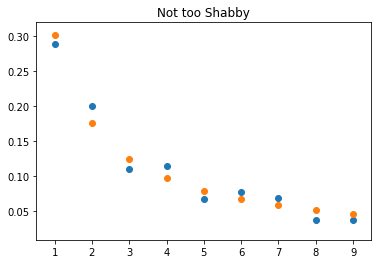

In [67]:

plt.scatter(x, prop) #Our data
plt.scatter(x, f(x))#Theoretical 
plt.title('Not too Shabby')

In [76]:
#Lets run the hypothesis test now!  Remember to use the expected value!
chi2 = 0
for i in range (0,len(x)):
    chi2 = chi2 + (count[i]-f(x)[i]*tot)**2/(f(x)[i]*tot)

In [77]:
chi2

11.573971384350095

In [78]:
#So this has n-1 df 
stats.chi2.cdf(chi2,8)

0.82875179792520659

In [79]:
#Be careful here!  This test is always right tailed!  
#Here I am getting the p value from the left tail so I will fail to reject the null hypothesis
#I should also check my conditions are met random data, expected freq is at least 5.
f(x)*tot

array([ 179.41387742,  104.9503904 ,   74.46348702,   57.75836775,
         47.19202264,   39.90028662,   34.5632004 ,   30.48690338,
         27.27146437])